In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df_vp = pd.read_excel("../raw_data/viability_vs_proliferation.xlsx")
df_vp = df_vp.rename(columns={"Celular line": "CellLine"})
df_vp["CellLine"] = df_vp["CellLine"].astype(str).str.strip()
df_vp["Enzyme"] = df_vp["Enzyme"].astype(str).str.strip()
df_vp["Treatment"] = pd.to_numeric(df_vp["Treatment"], errors="coerce")
df_vp["Viability"] = pd.to_numeric(df_vp["Viability"], errors="coerce")
df_vp = df_vp.dropna(subset=["CellLine", "Enzyme", "Treatment", "Viability"])

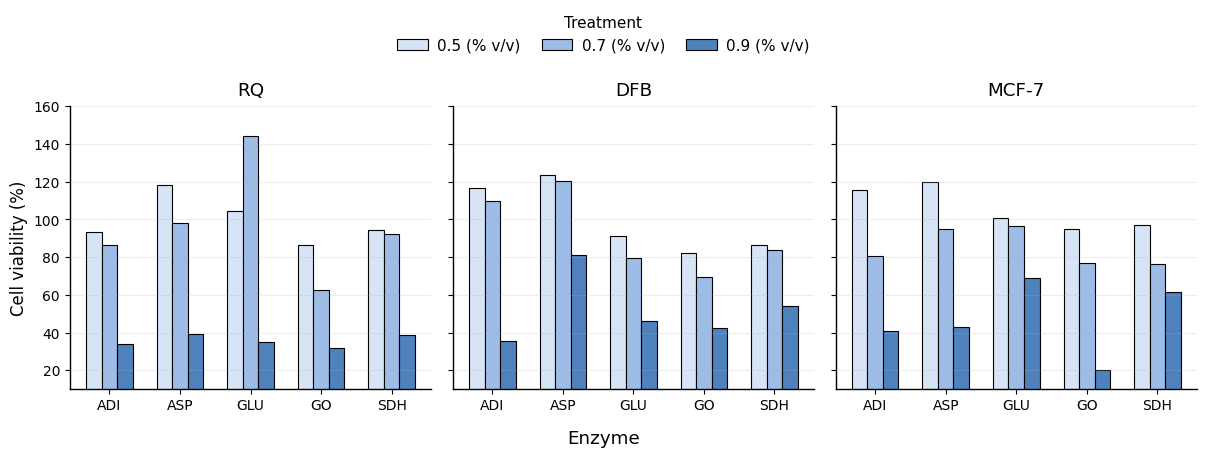

In [11]:
# ============================================================
# CORE 2A — Barplot: Viability vs Enzyme, faceted by Cell line
# ============================================================

# df_vp should already be loaded from viability_vs_proliferation.xlsx
# Safety check
required_cols = {"CellLine", "Enzyme", "Treatment", "Viability", "Proliferation"}
missing = required_cols - set(df_vp.columns)
if missing:
    raise ValueError(f"df_vp is missing required columns: {missing}")

# Orders
cell_order = ["RQ", "DFB", "MCF-7"]
enzyme_order = ["ADI", "ASP", "GLU", "GO", "SDH"]
treat_order = [0.5, 0.7, 0.9]

# Pastel blue palette by treatment (consistent with previous figs)
treat_blue = {
    0.5: "#D6E4F5",
    0.7: "#9DBCE6",
    0.9: "#4F81BD",
}

plt.rcParams.update({
    "font.size": 11,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.linewidth": 1.0,
})

fig, axes = plt.subplots(1, 3, figsize=(12.2, 4.2), sharey=True)
axes = np.atleast_1d(axes)

# Global y-limits for Viability
y_min = max(0, np.floor(df_vp["Viability"].min() / 10) * 10 - 10)
y_max = np.ceil(df_vp["Viability"].max() / 10) * 10 + 10

bar_width = 0.22
x = np.arange(len(enzyme_order))

for ax, cl in zip(axes, cell_order):
    dcl = df_vp[df_vp["CellLine"] == cl].copy()

    for i, t in enumerate(treat_order):
        dt = dcl[dcl["Treatment"] == t].set_index("Enzyme").reindex(enzyme_order)
        vals = dt["Viability"].values

        offsets = (i - (len(treat_order) - 1) / 2) * bar_width
        xpos = x + offsets

        ax.bar(
            xpos,
            vals,
            width=bar_width,
            color=treat_blue[t],
            edgecolor="black",
            linewidth=0.8,
            label=f"{t:g} (% v/v)" if cl == cell_order[0] else None
        )

    ax.set_title(cl, pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(enzyme_order)
    ax.set_ylim(y_min, y_max)

    ax.grid(axis="y", alpha=0.22, linewidth=0.8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Cell viability (%)")
fig.supxlabel("Enzyme", y=0.04)

# Legend (shared, on top)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Treatment",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=False,
    columnspacing=1.4,
    handletextpad=0.6
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

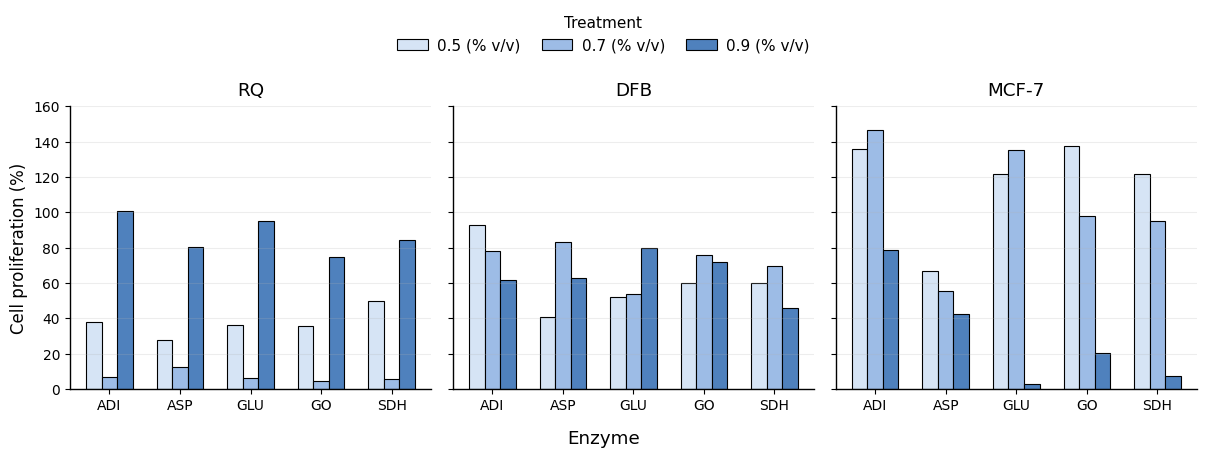

In [12]:
# ============================================================
# CORE 2B — Barplot: Proliferation vs Enzyme, faceted by Cell line
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(12.2, 4.2), sharey=True)
axes = np.atleast_1d(axes)

# Global y-limits for Proliferation
y_min = max(0, np.floor(df_vp["Proliferation"].min() / 10) * 10 - 10)
y_max = np.ceil(df_vp["Proliferation"].max() / 10) * 10 + 10

for ax, cl in zip(axes, cell_order):
    dcl = df_vp[df_vp["CellLine"] == cl].copy()

    for i, t in enumerate(treat_order):
        dt = dcl[dcl["Treatment"] == t].set_index("Enzyme").reindex(enzyme_order)
        vals = dt["Proliferation"].values

        offsets = (i - (len(treat_order) - 1) / 2) * bar_width
        xpos = x + offsets

        ax.bar(
            xpos,
            vals,
            width=bar_width,
            color=treat_blue[t],
            edgecolor="black",
            linewidth=0.8,
            label=f"{t:g} (% v/v)" if cl == cell_order[0] else None
        )

    ax.set_title(cl, pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(enzyme_order)
    ax.set_ylim(y_min, y_max)

    ax.grid(axis="y", alpha=0.22, linewidth=0.8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Cell proliferation (%)")
fig.supxlabel("Enzyme", y=0.04)

# Legend (shared, on top)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Treatment",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=False,
    columnspacing=1.4,
    handletextpad=0.6
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()